Defaulting to user installation because normal site-packages is not writeable
                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 3.5 MB/s eta 0:00:03
     -                                        0.3/10.6 MB 5.0 MB/s eta 0:00:03
     --                                       0.7/10.6 MB 5.2 MB/s eta 0:00:02
     ---                                      1.0/10.6 MB 6.0 MB/s eta 0:00:02
     -----                                    1.5/10.6 MB 6.7 MB/s eta 0:00:02
     -------                                  2.0/10.6 MB 7.4 MB/s eta 0:00:02
     ---------                                2.6/10.6 MB 8.3 MB/s eta 0:00:01
     ------------                             3.3/10.6 MB 9.1 MB/s eta 0:00:01
     ---------------                          4.1/10.6 MB 9.6 MB/s eta 0:00:01
     ------------------                       5.0/10.6 MB 10.7 MB/s eta 0:00:01
     -----------------------                  6.2/10.6 MB 1


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/7.6 MB ? eta -:--:--
     --                                       0.4/7.6 MB 13.2 MB/s eta 0:00:01
     ------                                   1.3/7.6 MB 16.7 MB/s eta 0:00:01
     -----------                              2.2/7.6 MB 19.7 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 44.6 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 40.8 MB/s eta 0:00:00
                                              0.0/480.5 kB ? eta -:--:--
     ------------------------------------- 480.5/480.5 kB 29.4 MB/s eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 2.1/2.1 MB 66.6 MB/s eta 0:00:00
                                              0.0/56.1 kB ? eta -:--:--
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
        


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Total samples: 100
   Unnamed: 0  time  WWWusage
0           1     1        88
1           2     2        84
2           3     3        85
3           4     4        85
4           5     5        84


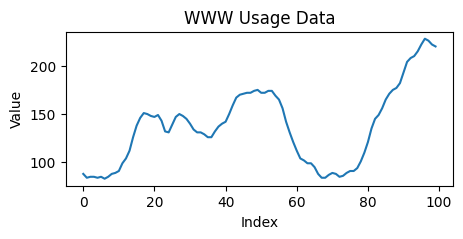

In [10]:
df = pd.read_csv('./data/wwwusage.csv')
print(f"Total samples: {len(df)}")
print(df.head())
# Set the plot size using figsize
plt.figure(figsize=(5, 2))  # Adjust the numbers as needed for width and height

# Plot the data
df["WWWusage"].plot(kind='line', title='WWW Usage Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

values = df["WWWusage"]

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/9.2 MB ? eta -:--:--
     -                                        0.3/9.2 MB 10.2 MB/s eta 0:00:01
     -------                                  1.6/9.2 MB 17.0 MB/s eta 0:00:01
     ---------                                2.1/9.2 MB 22.1 MB/s eta 0:00:01
     ---------                                2.1/9.2 MB 22.1 MB/s eta 0:00:01
     -------------------                      4.6/9.2 MB 22.5 MB/s eta 0:00:01
     ------------------------------------     8.3/9.2 MB 33.1 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 32.5 MB/s eta 0:00:00
                                              0.0/44.1 MB ? eta -:--:--
     ----                                    4.9/44.1 MB 103.1 MB/s eta 0:00:01
     -------                                 8.5/44.1 MB 109.1 MB/s eta 0:00:01
     ----------                              11.5/44.1 MB 81.8 MB/


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


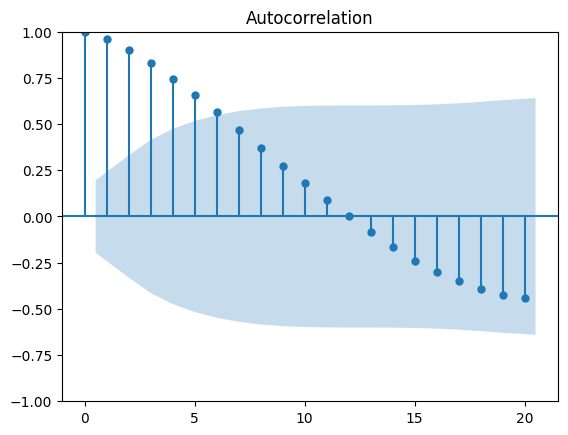

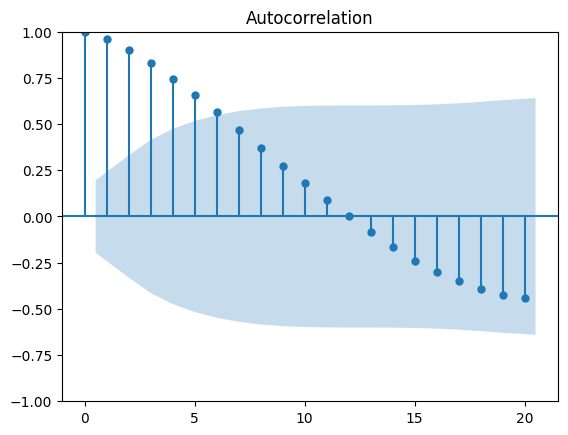

In [11]:
!pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(values)


In [55]:
# augmented dickey fuller

from statsmodels.tsa.stattools import adfuller

result = adfuller(values.dropna())
print('p-value: ', result[1])

result = adfuller(values.diff().dropna())
print('p-value: ', result[1])

result = adfuller(values.diff().diff().dropna())
print('p-value: ', result[1])


p-value:  0.12441935447109442
p-value:  0.07026846015272718
p-value:  2.843428755547158e-17


                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                   80
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -201.756
Date:                Wed, 18 Oct 2023   AIC                            411.511
Time:                        14:18:09   BIC                            420.938
Sample:                             0   HQIC                           415.285
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6477      0.113      5.719      0.000       0.426       0.870
ma.L1         -0.5207      8.049     -0.065      0.948     -16.297      15.255
ma.L2         -0.4791      3.830     -0.125      0.9

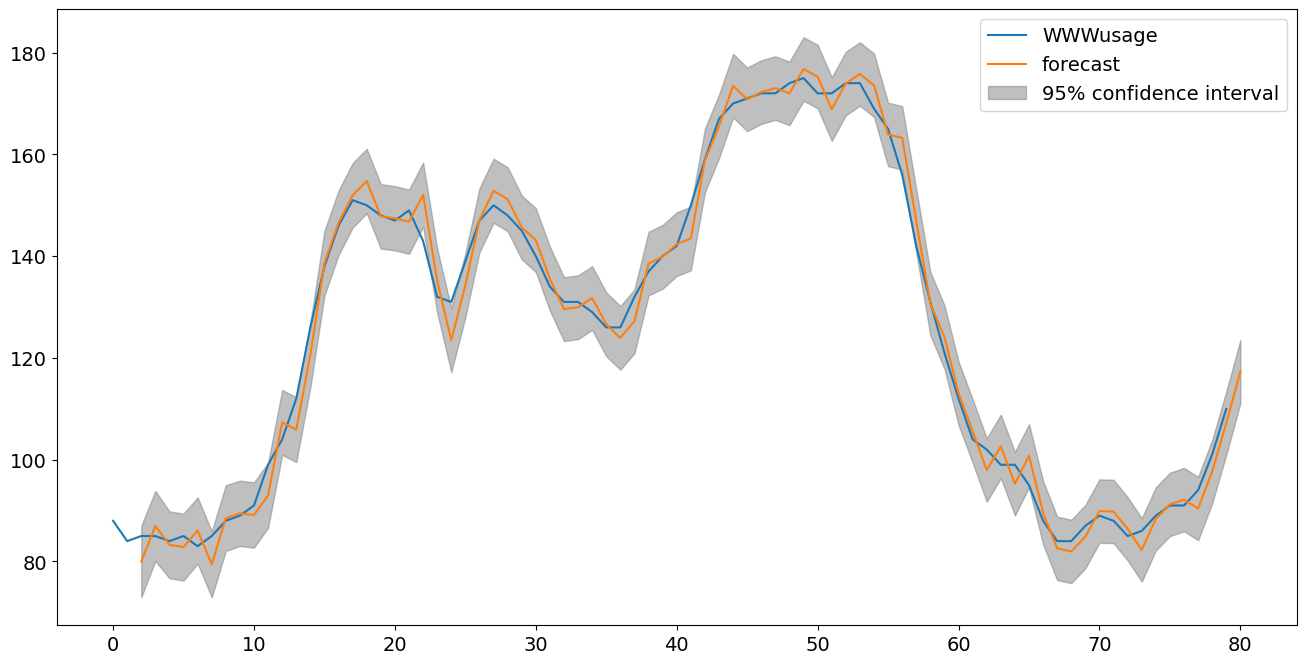

In [59]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Fit the ARIMA model
arima_model = ARIMA(values[:80], order=(1,2,2))
model = arima_model.fit()


print(model.summary())

fix, ax = plt.subplots()
ax = values[:80].plot(ax=ax)
plot_predict(model, start=df["time"][1], end=df["time"][79], ax=ax)
plt.show()


2      79.999771
3      86.980285
4      83.271614
5      82.822249
6      86.086660
         ...    
75     91.214153
76     92.161901
77     90.396613
78     97.660422
79    107.186636
Length: 78, dtype: float64
80    117.283112
81    122.122326
82    125.378615
83    127.609637
84    129.176587
85    130.313415
86    131.171651
87    131.849441
88    132.410355
89    132.895569
90    133.331751
91    133.736174
92    134.120028
93    134.490559
94    134.852459
95    135.208771
96    135.561462
97    135.911809
98    136.260636
99    136.608480
Name: predicted_mean, dtype: float64
2      79.999771
3      86.980285
4      83.271614
5      82.822249
6      86.086660
         ...    
95    135.208771
96    135.561462
97    135.911809
98    136.260636
99    136.608480
Length: 98, dtype: float64


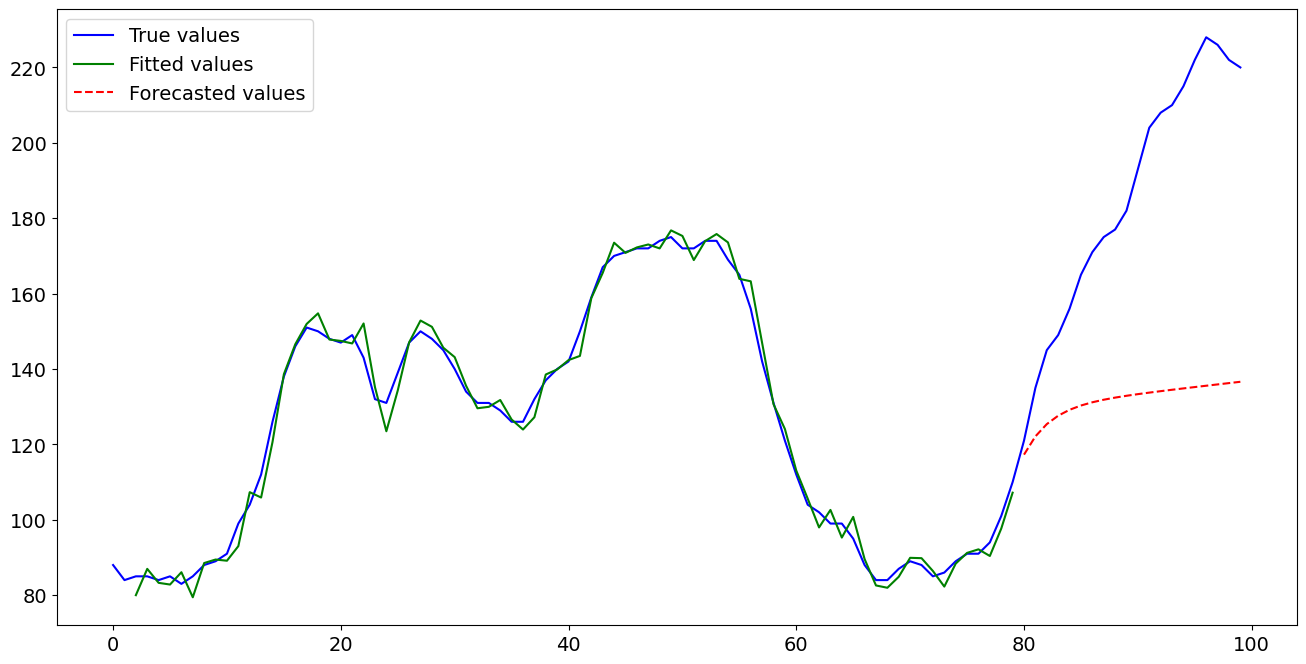

In [73]:
import pandas as pd
import numpy as np

# Create a series of predicted values
y_fitted = model.fittedvalues[2:]
y_pred = model.forecast(20)
print(y_fitted)
print(y_pred)
y = pd.concat([y_fitted, y_pred])
print(y)

# Get the actual values from the dataframe for comparison
y_true_full = values
y_true = values[80:]

fig, ax = plt.subplots()

# Plot the true values
ax.plot(y_true_full.index, y_true_full, label='True values', color='blue')

# Plot the fitted values (up to 80)
ax.plot(y_fitted.index, y_fitted, label='Fitted values', color='green')

# Plot the forecasted values (from 80 onwards)
ax.plot(y_pred.index, y_pred, label='Forecasted values', color='red', linestyle='--')

# Set the legend
ax.legend()

plt.show()




In [74]:
import pprint

# Compute error metrics
mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))  # Mean absolute percentage error
mae = np.mean(np.abs(y_pred - y_true))                    # Mean absolute error
mpe = np.mean((y_pred - y_true) / y_true)                 # Mean percentage error
rmse = np.sqrt(np.mean((y_pred - y_true)**2))             # Root Mean Squared Error
corr = np.corrcoef(y_pred, y_true)[0, 1]                  # Correlation Coefficient

# MinMax Error
mins = np.minimum(y_pred, y_true)
maxs = np.maximum(y_pred, y_true)
minmax = 1 - np.mean(mins / maxs)

# Print results using pretty print
metrics = {
    'mape': mape,
    'mae': mae,
    'mpe': mpe,
    'rmse': rmse,
    'corr': corr,
    'minmax': minmax
}

pprint.pprint(metrics)







{'corr': 0.9328652877618426,
 'mae': 54.68535812494773,
 'mape': 0.27448845286833146,
 'minmax': 0.27448845286833146,
 'mpe': -0.27448845286833146,
 'rmse': 61.38905719838215}
